<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'>Predict Hotel Reservation Cancellation</h1>
</div>

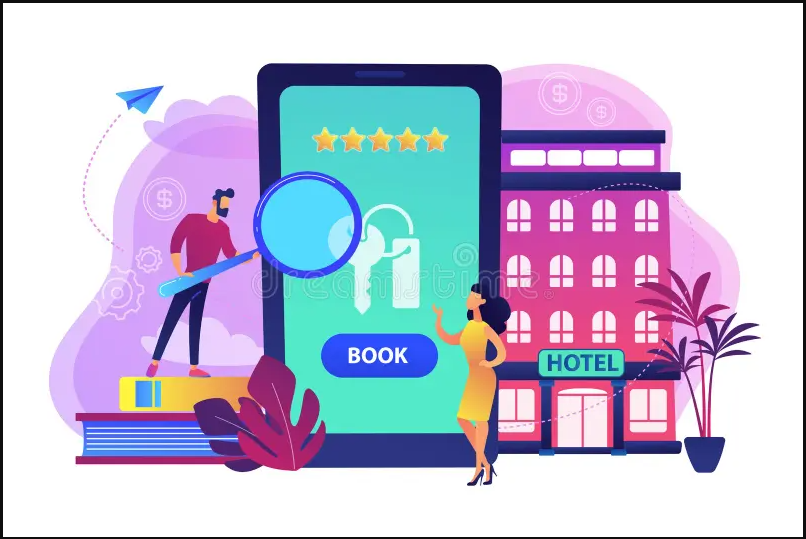

**Author:-** Aniket B. Barphe
    
**LinkedIn Profile:-** https://www.linkedin.com/in/aniiketbarphe/
        
**Platform:-** AI Planet (https://aiplanet.com/)
    
**Problem Statement:-** Build a machine learning-based approach to predict the hotel reservation cancellation

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Setup Environment</h2>
</div>

- Import the libraries
- Set the options for better visulization

In [153]:
# Data manipulation
from sklearn.preprocessing import LabelEncoder
from scipy.stats import loguniform
import numpy as np
import pandas as pd
import os

# Data Visualazation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Machine learning
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from lightgbm import LGBMModel,LGBMClassifier
import catboost as cb
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

# Model Evaluations
import sklearn as sk
from sklearn.utils.class_weight import compute_class_weight
import sklearn.metrics as metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score

# print module versions for reproducibility
print('CatBoost version {}'.format(cb.__version__))
print('NumPy version {}'.format(np.__version__))
print('Pandas version {}'.format(pd.__version__))
print('seaborn version {}'.format(sns.__version__))
print('sklearn version {}'.format(sk.__version__))
print('xgboost version {}'.format(xgb.__version__))
print('lightgbm version {}'.format(lgb.__version__))

# User Defined Functions

# a) BoxPlot:- To check Outliers
def Create_BoxPlotS(DataFrame, Features, Rows, Columns):
    fig=plt.figure(figsize=(20,20))
    for i, Feature in enumerate(Features[0:]):
        ax=fig.add_subplot(Rows,Columns,i+1)
        sns.boxplot(DataFrame[Feature],ax=ax)   
    fig.tight_layout()  
    plt.show()
    
# b) DistPlot:- To check Normality
def Create_DistPlots(DataFrame, Features, Rows, Columns):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(Features[0:]):
        ax=fig.add_subplot(Rows,Columns,i+1)
        sns.distplot(DataFrame[feature],ax=ax)    
    fig.tight_layout()  
    plt.show()

# c) Univariate Analysis of Catagorical Variables
def Univariate_Cat_Features(DataFrame, Features, Rows, Columns):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(Features[0:]):
        ax=fig.add_subplot(Rows,Columns,i+1)
        sns.countplot(DataFrame[feature],ax=ax)    
    fig.tight_layout()  
    plt.show()
    
# d) Scatter Plot:- Bivariate Analysis between Target Variable & Independent Variables
# Note:- Pass Target_Variable in Single Quote in this function
def Create_ScatterPlots(DataFrame, Features, Target_Variable, Rows, Columns):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(Features[0:]):
        ax=fig.add_subplot(Rows,Columns,i+1)
        sns.scatterplot(DataFrame[feature],DataFrame[Target_Variable],ax=ax)  
    fig.tight_layout()  
    plt.show()

# e) Joint Plot:- Bivariate Analysis between Target Variable & Independent Variables
# Note:- Pass Target_Variable in Single Quote in this function
def Create_JointPlots(DataFrame, Features, Target_Variable):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(Features[0:]):
        sns.jointplot(y= Target_Variable, x= DataFrame[feature], data = DataFrame,kind='reg')
    fig.tight_layout()  
    plt.show()

# f) Check Feature wise Outliers   
def Check_Outliers(DataFrame, Column_List):
    for column in Column_List:    
        q1 = DataFrame[column].quantile(0.25)    # First Quartile
        q3 = DataFrame[column].quantile(0.75)    # Third Quartile
        IQR = q3 - q1                            # Inter Quartile Range
        llimit = q1 - 1.5*IQR                    # Lower Limit
        ulimit = q3 + 1.5*IQR                    # Upper Limit
        outliers = DataFrame[(DataFrame[column] < llimit) | (DataFrame[column] > ulimit)]
        print('\nNumber of outliers in "' + column + '" :' + str(len(outliers)))
        print('\nLower Limit in "' + column + '" :',llimit)
        print('\nUpper Limit in "' + column + '" :',ulimit)
        print('\nInter Quartile Range of "' + column + '" :',IQR,"\n")

# g) Label Encoding   
def Label_Encoder(DataFrame):
    le = LabelEncoder()
    for col in DataFrame.columns:
        if(DataFrame[col].dtype == 'object'):
            DataFrame.loc[:,col] = le.fit_transform(DataFrame.loc[:,col])

CatBoost version 1.2
NumPy version 1.21.5
Pandas version 1.4.2
seaborn version 0.11.2
sklearn version 1.3.0
xgboost version 1.7.6
lightgbm version 3.3.5


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Load Data</h2>
</div>

- Read & Load "Train" data in "train" Variable 
- Read & Load "Test" data in "test" Variable

In [154]:
train = pd.read_csv(r'C:\Users\AB\Favorites\AB\Apnet\RCP\train_dataset.csv')
test = pd.read_csv(r'C:\Users\AB\Favorites\AB\Apnet\RCP\test_dataset.csv')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Overview</h2>
</div>

- Get the basic information of the data
- Check Top 5 entries of the data
- Check Bottom 5 entries of the data
- Statistical Insight of Train Dataset including Categorical Variable
- Statistical Insight of Test Dataset including Categorical Variable
- Check Null Entries in Train Dataset 
- Check Null Entries in Test Dataset 
- Check Unique Entries in Train Dataset 
- Check Unique Entries in Test Dataset

In [155]:
print("Data Types in Train Data:-\n")
print(train.info(),'\n')

print("Shape of Train Data:-\n")
print(train.shape,'\n')

print('-------------'*9)

print("\nData Types in Test Data:-\n")
print(test.info(),'\n')

print("\nShape of Test Data:-\n")
print(test.shape,'\n')

print('-------------'*9)

Data Types in Train Data:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          18137 non-null  int64  
 1   no_of_children                        18137 non-null  int64  
 2   no_of_weekend_nights                  18137 non-null  int64  
 3   no_of_week_nights                     18137 non-null  int64  
 4   type_of_meal_plan                     18137 non-null  int64  
 5   required_car_parking_space            18137 non-null  int64  
 6   room_type_reserved                    18137 non-null  int64  
 7   lead_time                             18137 non-null  int64  
 8   arrival_year                          18137 non-null  int64  
 9   arrival_month                         18137 non-null  int64  
 10  arrival_date                          18137 non-null  

In [156]:
print("About Train Data:-\n")
print(train.head(),'\n')
print('-------------'*9)

print("\nAbout Test Data:-\n")
print(test.head(),'\n')
print('-------------'*9)

About Train Data:-

   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  4   
1             2               1                     0                  2   
2             1               0                     1                  5   
3             1               0                     2                  4   
4             2               0                     0                  4   

   type_of_meal_plan  required_car_parking_space  room_type_reserved  \
0                  0                           0                   0   
1                  0                           0                   0   
2                  0                           0                   0   
3                  0                           0                   0   
4                  1                           0                   0   

   lead_time  arrival_year  arrival_month  arrival_date  market_segment_type  \
0        1

In [157]:
print("About Train Data:-\n")
print(train.tail(),'\n')
print('-------------'*9)

print("\nAbout Test Data:-\n")
print(test.tail(),'\n')
print('-------------'*9)

About Train Data:-

       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
18132             1               0                     0                  2   
18133             2               0                     0                  3   
18134             2               0                     0                  1   
18135             2               0                     0                  3   
18136             1               0                     1                  1   

       type_of_meal_plan  required_car_parking_space  room_type_reserved  \
18132                  0                           0                   0   
18133                  0                           0                   0   
18134                  0                           0                   0   
18135                  0                           0                   0   
18136                  0                           0                   0   

       lead_time  arrival_year  arrival_mo

In [158]:
train.describe(include='all')  
# Below Line will provide Statistical Insight of data for Numerical Variable Only
# train.describe()  

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000
mean,1.846777,0.107515,0.811104,2.208965,0.318465,0.031648,0.336770,85.377405,2017.820698,7.432762,15.660804,0.806197,0.025087,0.022440,0.151403,103.478868,0.617522,0.327618
std,0.516020,0.408901,0.873470,1.426365,0.629140,0.175066,0.772865,86.611736,0.383616,3.076999,8.772788,0.645972,0.156393,0.370078,1.714135,35.474103,0.787941,0.469357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,127.000000,2018.000000,10.000000,23.000000,1.000000,0.000000,0.000000,0.000000,120.270000,1.000000,1.000000
max,4.000000,9.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


In [159]:
test.describe(include='all')
# Below Line will provide Statistical Insight of data for Numerical Variable Only
# test.describe()  

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,18138.000000,18138.000000,18138.000000,18138.000000,18138.000000,18138.000000,18138.000000,18138.000000,18138.000000,18138.000000,18138.000000,18138.000000,18138.000000,18138.000000,18138.000000,18138.000000,18138.000000
mean,1.843147,0.103043,0.810343,2.199636,0.329639,0.030323,0.337579,85.087716,2017.820157,7.414544,15.533190,0.803010,0.026188,0.024258,0.155420,103.368213,0.621789
std,0.521403,0.396295,0.867833,1.395298,0.639016,0.171479,0.778920,85.246638,0.384068,3.062831,8.707763,0.647802,0.159699,0.366585,1.793356,34.701392,0.784543
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.430000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.750000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,1.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,6.000000,16.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,57.000000,365.000000,5.000000


In [160]:
print("Checking Null entries & their Percentage in Train Data:-\n\n")
missing_val_train=pd.DataFrame(zip(train.isnull().sum()
                                   ,train.isnull().sum()*100/len(train))
                               ,columns=['Missing Values','Percentage Missing Values'],index=train.columns)
missing_val_train

Checking Null entries & their Percentage in Train Data:-




,Missing Values,Percentage Missing Values
no_of_adults,0,0.0
no_of_children,0,0.0
no_of_weekend_nights,0,0.0
no_of_week_nights,0,0.0
type_of_meal_plan,0,0.0
required_car_parking_space,0,0.0
room_type_reserved,0,0.0
lead_time,0,0.0
arrival_year,0,0.0
arrival_month,0,0.0


In [161]:
print("Checking Null entries & their Percentage in Test Data:-\n\n")
missing_val_test=pd.DataFrame(zip(test.isnull().sum()
                                  ,test.isnull().sum()*100/len(test))
                              ,columns=['Missing Values','Percentage Missing Values'],index=test.columns)
missing_val_test

Checking Null entries & their Percentage in Test Data:-




,Missing Values,Percentage Missing Values
no_of_adults,0,0.0
no_of_children,0,0.0
no_of_weekend_nights,0,0.0
no_of_week_nights,0,0.0
type_of_meal_plan,0,0.0
required_car_parking_space,0,0.0
room_type_reserved,0,0.0
lead_time,0,0.0
arrival_year,0,0.0
arrival_month,0,0.0


In [162]:
# Checking Unique entries in Train Data
listItem = []
for col in train.columns :
    listItem.append( [col, train[col].nunique(), train[col].unique()])

train_unique = pd.DataFrame(columns=['Column_Name', 'Number_of_Unique_Values', 'Unique_Sample'],
                     data=listItem)
print("Unique entries in Train Data are :-\n\n")
print('-------------'*9)
train_unique

Unique entries in Train Data are :-


---------------------------------------------------------------------------------------------------------------------


,Column_Name,Number_of_Unique_Values,Unique_Sample
0,no_of_adults,5,"[2, 1, 3, 0, 4]"
1,no_of_children,5,"[0, 1, 2, 9, 3]"
2,no_of_weekend_nights,8,"[1, 0, 2, 3, 6, 5, 4, 7]"
3,no_of_week_nights,18,"[4, 2, 5, 3, 1, 0, 14, 7, 13, 6, 9, 8, 12, 10,..."
4,type_of_meal_plan,4,"[0, 1, 2, 3]"
5,required_car_parking_space,2,"[0, 1]"
6,room_type_reserved,7,"[0, 1, 4, 3, 2, 5, 6]"
7,lead_time,341,"[118, 17, 349, 69, 11, 51, 7, 61, 32, 39, 23, ..."
8,arrival_year,2,"[2017, 2018]"
9,arrival_month,12,"[12, 4, 10, 6, 1, 9, 2, 11, 8, 3, 5, 7]"


In [163]:
# Checking Unique entries in Test Data
listItem = []
for col in test.columns :
    listItem.append( [col, test[col].nunique(), test[col].unique()])

test_unique = pd.DataFrame(columns=['Column_Name', 'Number_of_Unique_Values', 'Unique_Sample'],
                     data=listItem)
print("Unique entries in Test Data are :-\n\n")
print('-------------'*9)
test_unique

Unique entries in Test Data are :-


---------------------------------------------------------------------------------------------------------------------


,Column_Name,Number_of_Unique_Values,Unique_Sample
0,no_of_adults,5,"[2, 1, 3, 0, 4]"
1,no_of_children,5,"[0, 2, 1, 3, 10]"
2,no_of_weekend_nights,7,"[1, 0, 2, 4, 3, 6, 5]"
3,no_of_week_nights,17,"[2, 3, 0, 4, 1, 8, 5, 7, 6, 10, 15, 12, 9, 13,..."
4,type_of_meal_plan,4,"[0, 2, 1, 3]"
5,required_car_parking_space,2,"[1, 0]"
6,room_type_reserved,7,"[0, 1, 3, 4, 2, 5, 6]"
7,lead_time,343,"[65, 322, 115, 386, 51, 102, 3, 45, 273, 17, 3..."
8,arrival_year,2,"[2018, 2017]"
9,arrival_month,12,"[3, 12, 2, 10, 8, 9, 11, 6, 4, 5, 7, 1]"


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Visualization</h2>
</div>

- Understand more about "Train" Data


In [164]:
# Segregation of Numerical Columns from Train Data
num_cols_train = train.select_dtypes(['int64','float64']).columns
print("Shape of Numerical Features in Train data is:-\n\n",num_cols_train.shape)
print("Numerical Columns in Train Data are :-\n\n")
print(num_cols_train)
print('-------------'*9)

# Segregation of Catagorical Columns from Train Data
cat_cols_train = train.select_dtypes(['object']).columns
print("Catagorical Columns in Train Data are :-\n\n")
print(cat_cols_train)
print('-------------'*9)

Shape of Numerical Features in Train data is:-

 (18,)
Numerical Columns in Train Data are :-


Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')
---------------------------------------------------------------------------------------------------------------------
Catagorical Columns in Train Data are :-


Index([], dtype='object')
---------------------------------------------------------------------------------------------------------------------


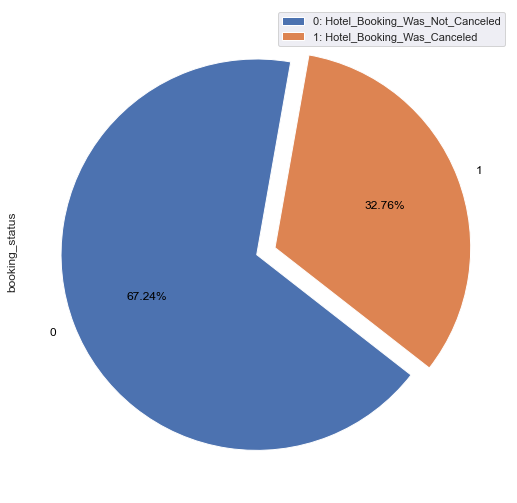

In [165]:
# Check the distribution of Target variable to see if it's a case of unbalanced class
train.booking_status.value_counts().plot(kind='pie', subplots=True
                                            , autopct='%1.2f%%', explode= (0.05, 0.05)
                                            , startangle=80, legend=True, fontsize=12
                                            , figsize=(14,9), textprops={'color':"black"})
plt.legend(["0: Hotel_Booking_Was_Not_Canceled","1: Hotel_Booking_Was_Canceled"]);

In [166]:
y_original = train['booking_status']
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_original), y=y_original)
print("Class Weights:", class_weights)

Class Weights: [0.74362444 1.52616964]


In [167]:
# Check Outliers in the Train Dataset
Check_Outliers(train,num_cols_train)


Number of outliers in "no_of_adults" :5033

Lower Limit in "no_of_adults" : 2.0

Upper Limit in "no_of_adults" : 2.0

Inter Quartile Range of "no_of_adults" : 0.0 


Number of outliers in "no_of_children" :1370

Lower Limit in "no_of_children" : 0.0

Upper Limit in "no_of_children" : 0.0

Inter Quartile Range of "no_of_children" : 0.0 


Number of outliers in "no_of_weekend_nights" :14

Lower Limit in "no_of_weekend_nights" : -3.0

Upper Limit in "no_of_weekend_nights" : 5.0

Inter Quartile Range of "no_of_weekend_nights" : 2.0 


Number of outliers in "no_of_week_nights" :166

Lower Limit in "no_of_week_nights" : -2.0

Upper Limit in "no_of_week_nights" : 6.0

Inter Quartile Range of "no_of_week_nights" : 2.0 


Number of outliers in "type_of_meal_plan" :4158

Lower Limit in "type_of_meal_plan" : 0.0

Upper Limit in "type_of_meal_plan" : 0.0

Inter Quartile Range of "type_of_meal_plan" : 0.0 


Number of outliers in "required_car_parking_space" :574

Lower Limit in "required_car_park

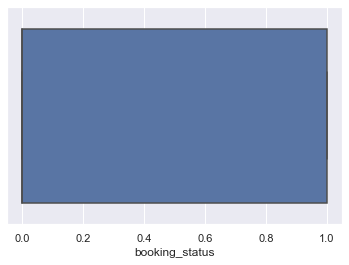

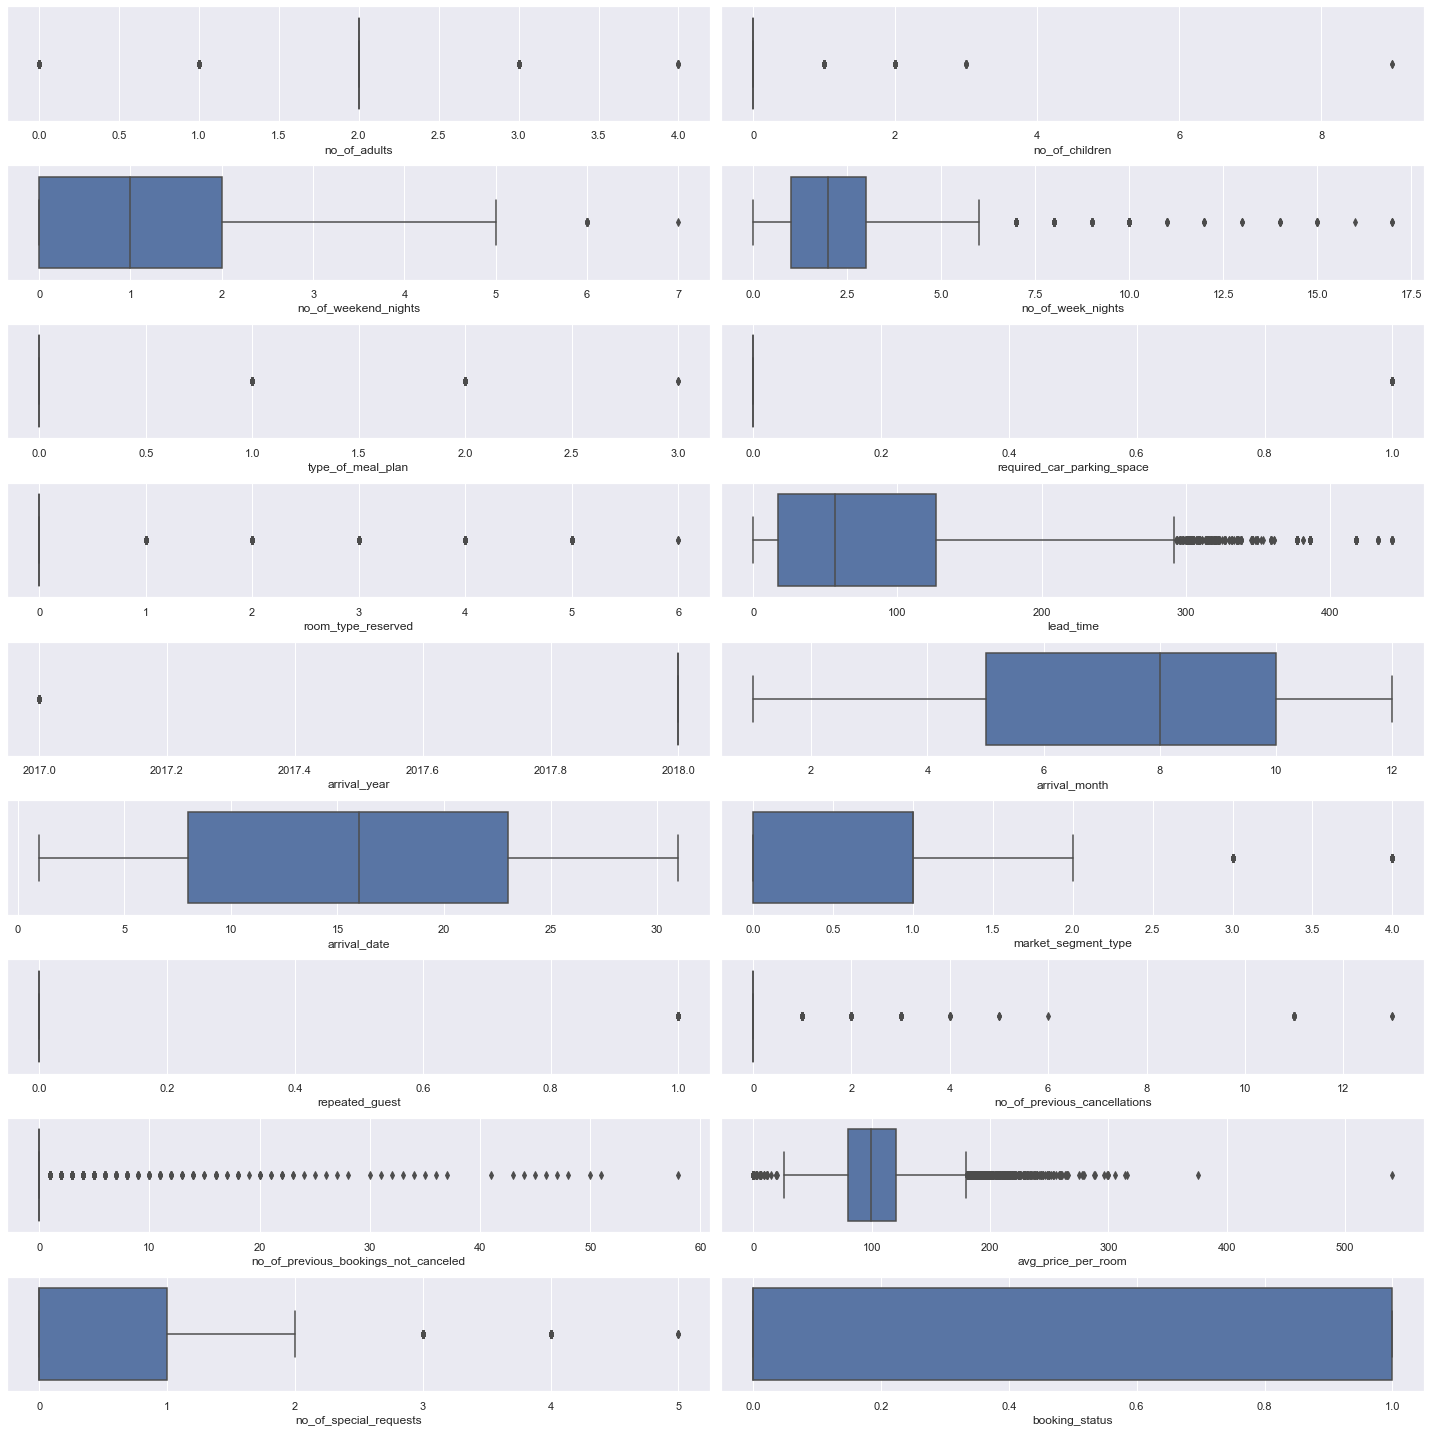

In [168]:
# Univariate Analysis of Numerical Variables Train DataSet (Check Outliers)

# Dependent Numerical Variable
sns.boxplot(train['booking_status']);

# Independent Numerical Variable
Create_BoxPlotS(train,num_cols_train,9,2)

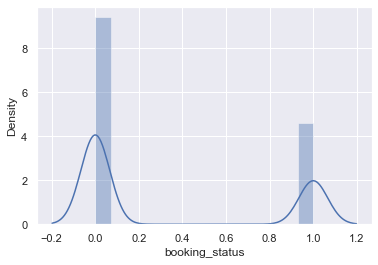

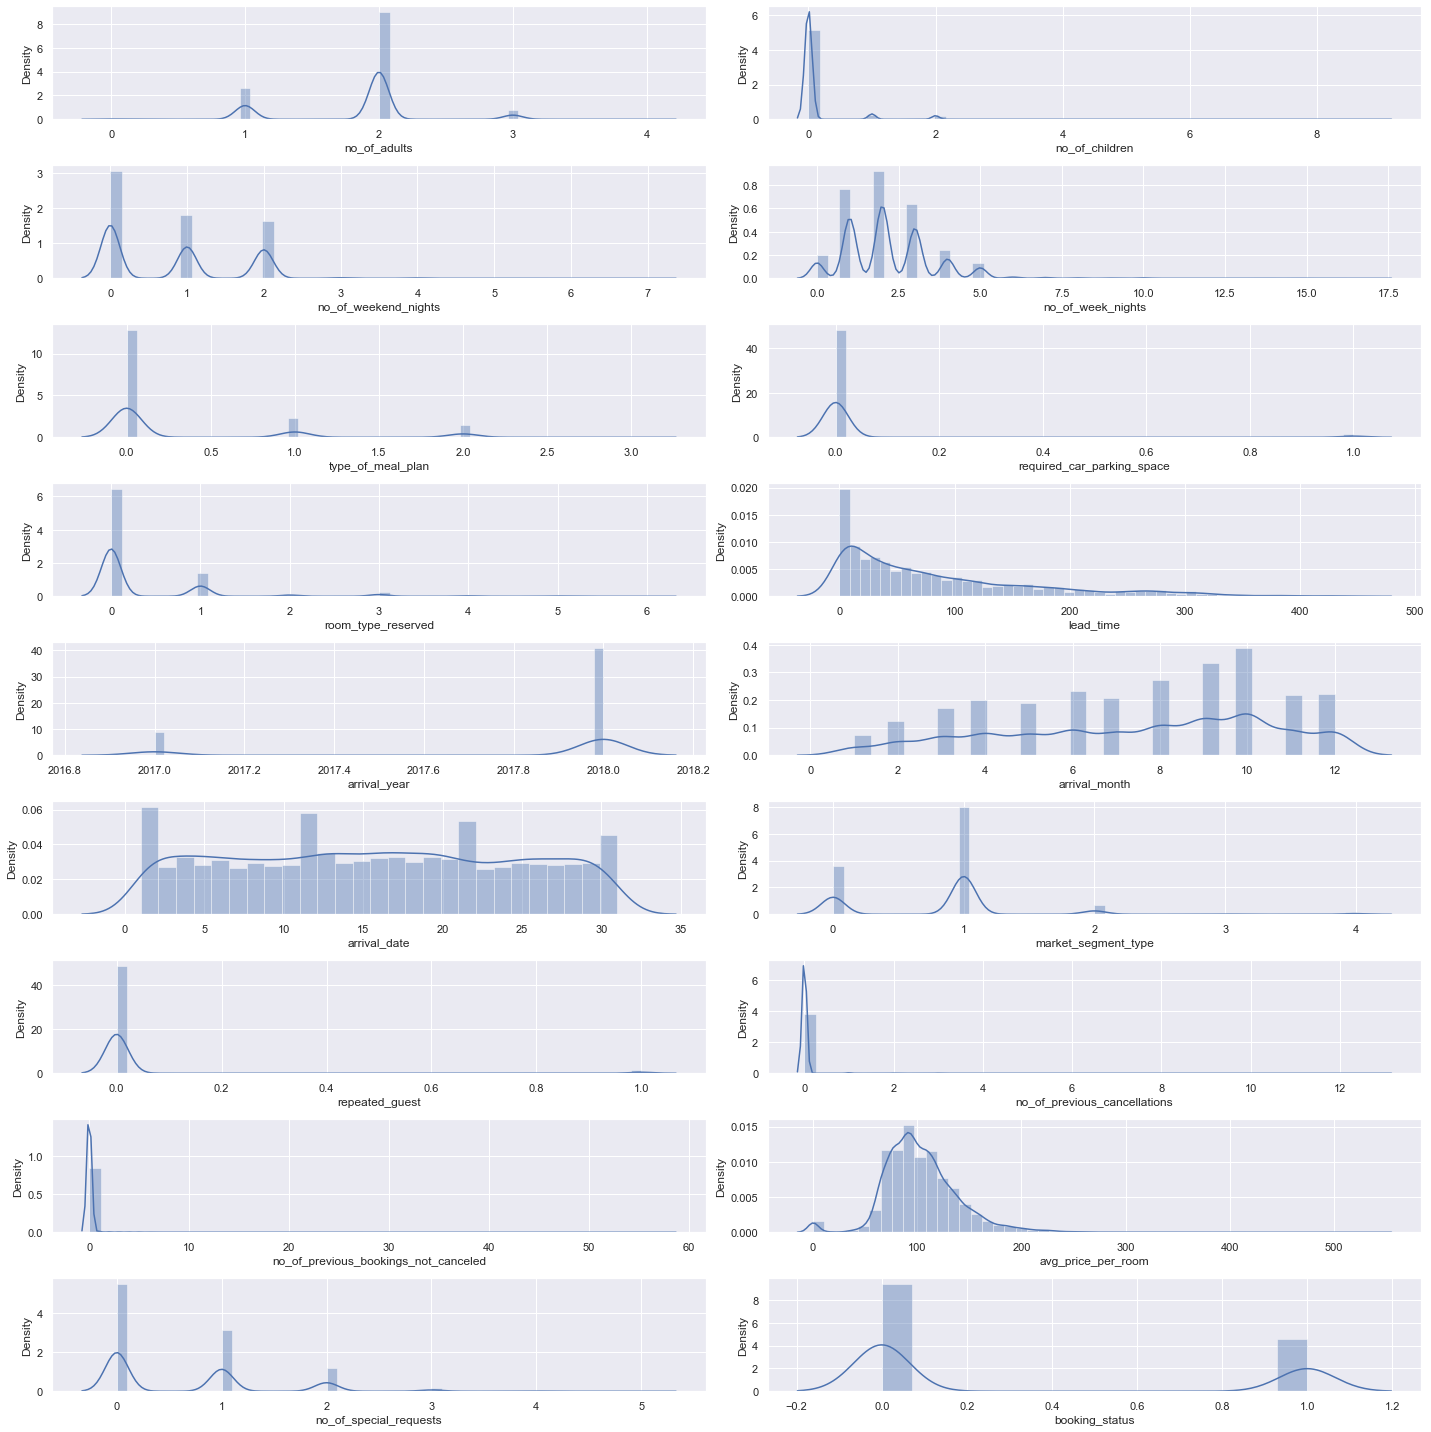

In [169]:
# Univariate Analysis of Numerical Variables Train DataSet (Check Normality)

# Dependent Numerical Variable
sns.distplot(train['booking_status']);

# Independent Numerical Variable
Create_DistPlots(train,num_cols_train,9,2)

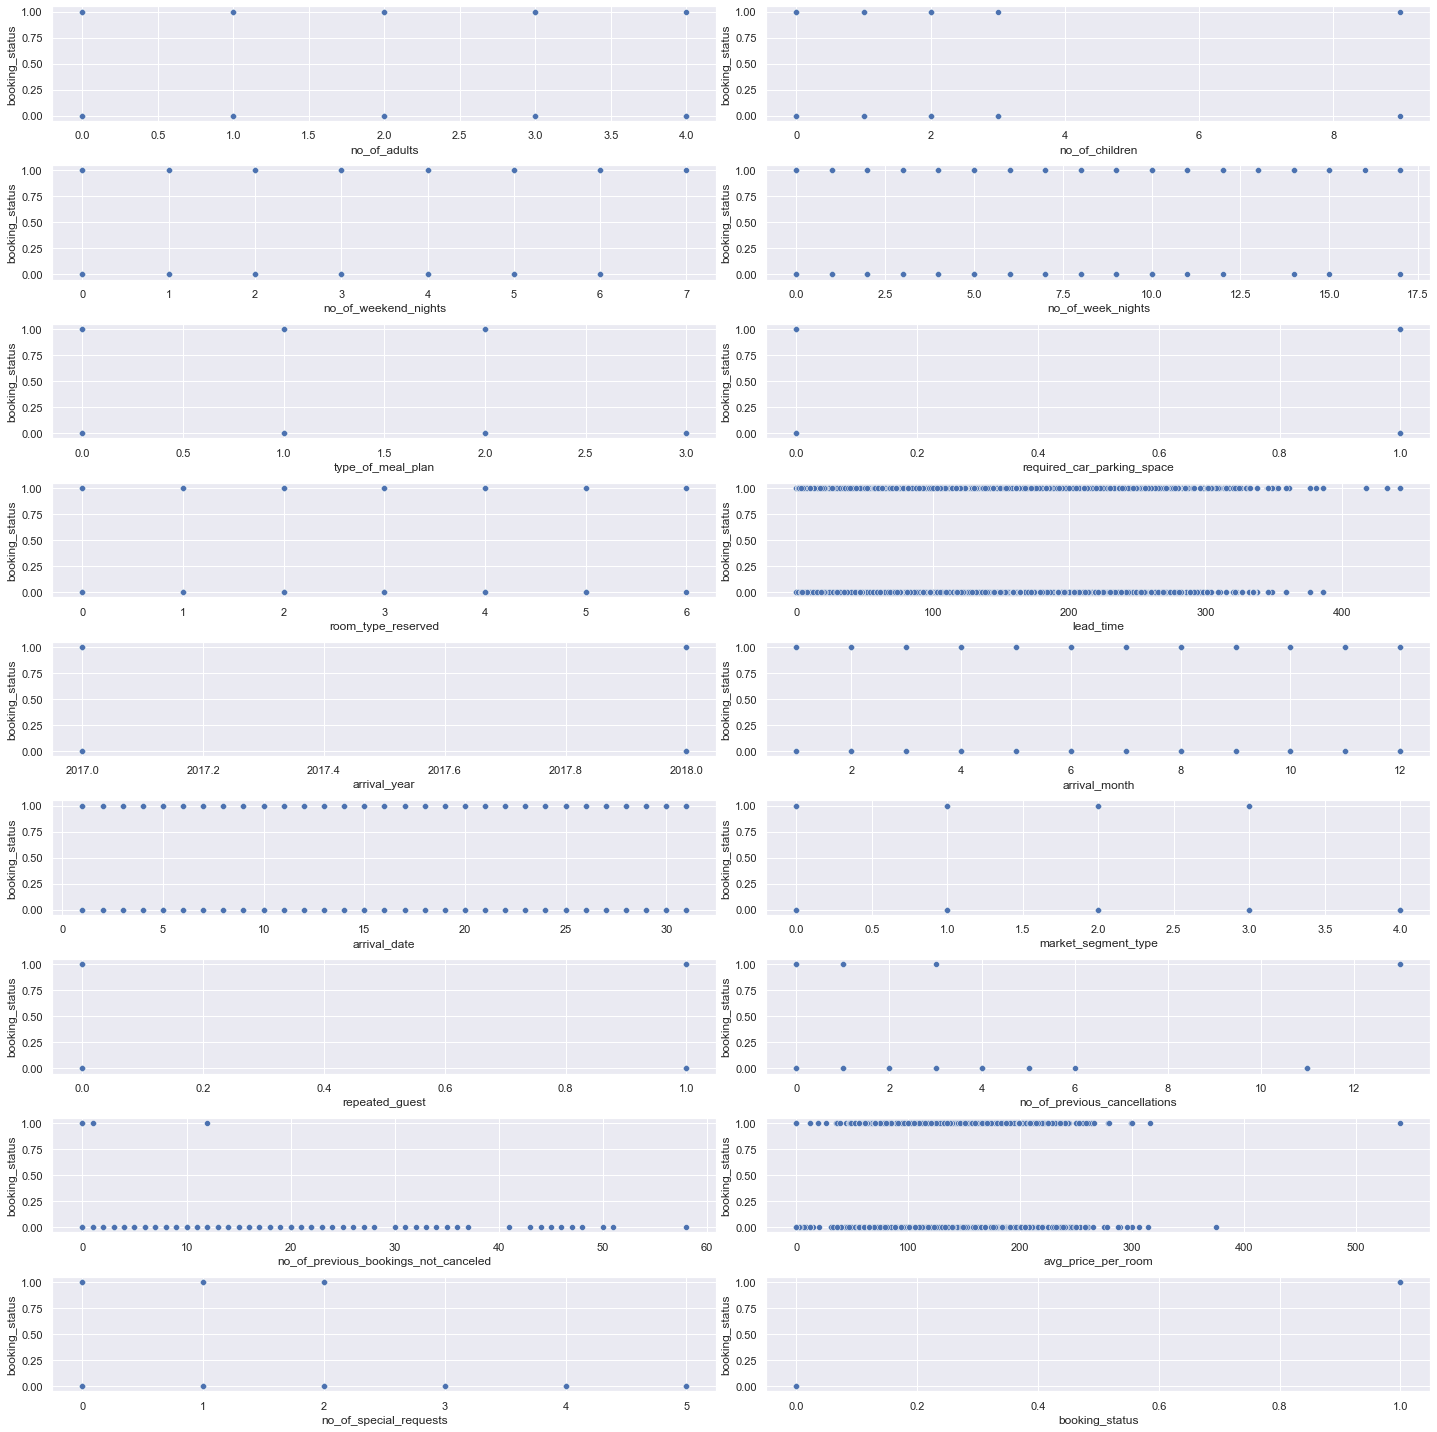

In [170]:
# Bivariate Analysis between Target Variable & Independent Variables(Numerical Variables) 
Create_ScatterPlots(train,num_cols_train,'booking_status',9,2)

<Figure size 1440x1440 with 0 Axes>

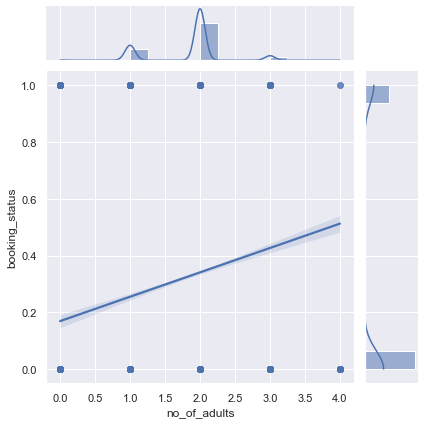

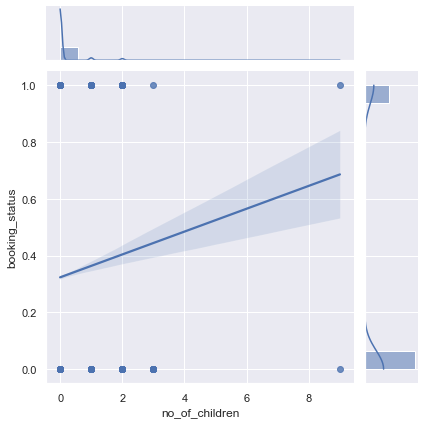

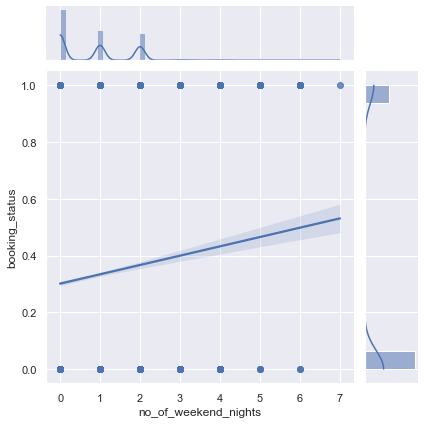

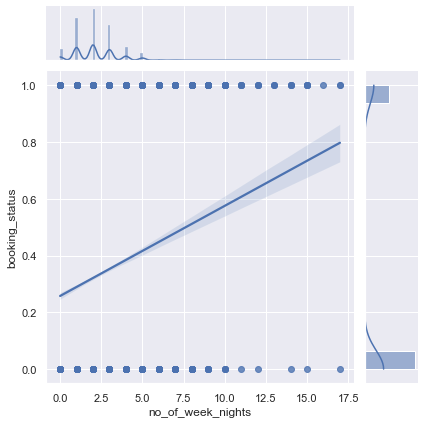

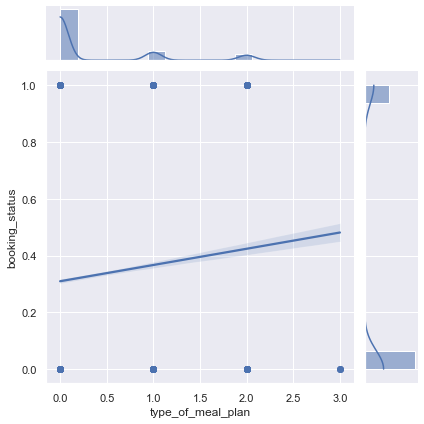

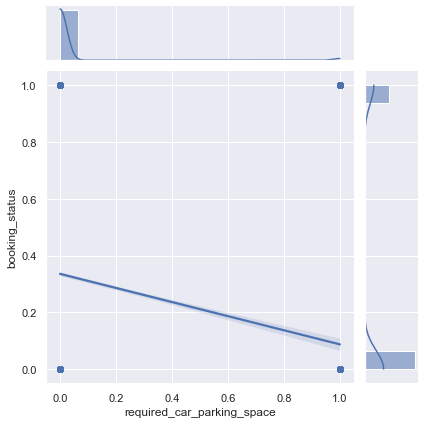

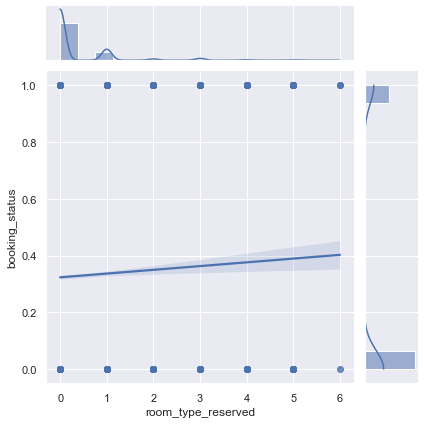

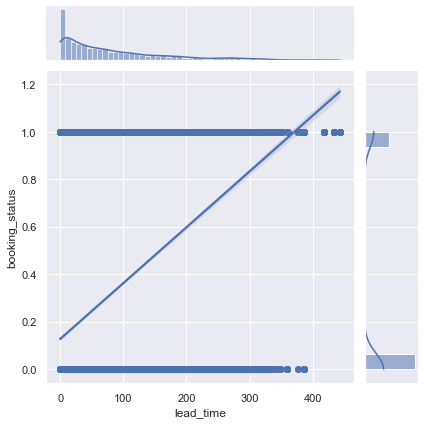

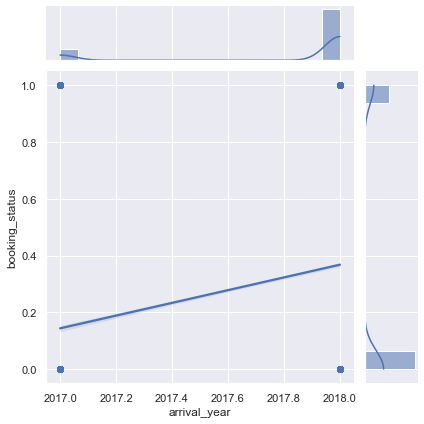

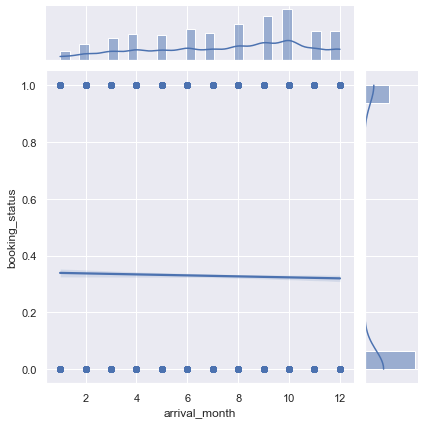

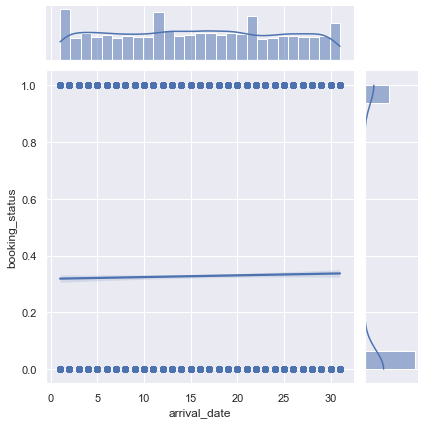

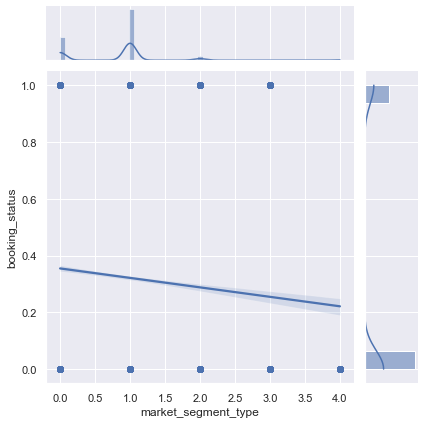

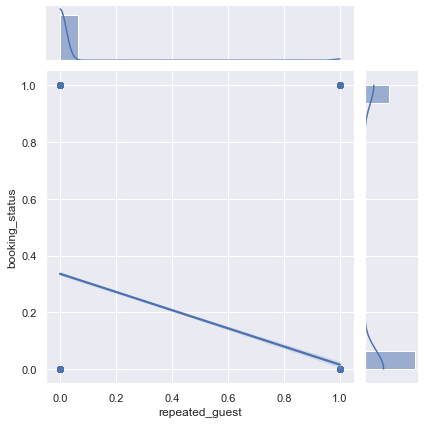

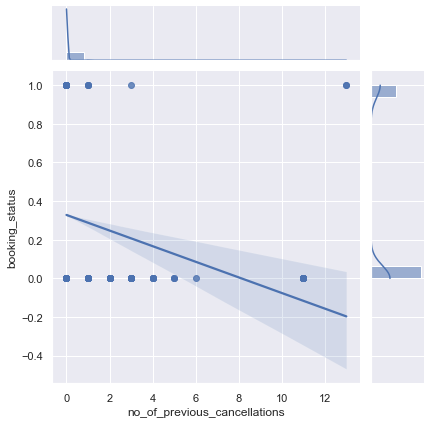

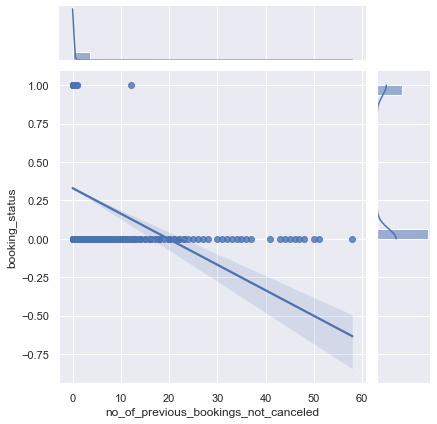

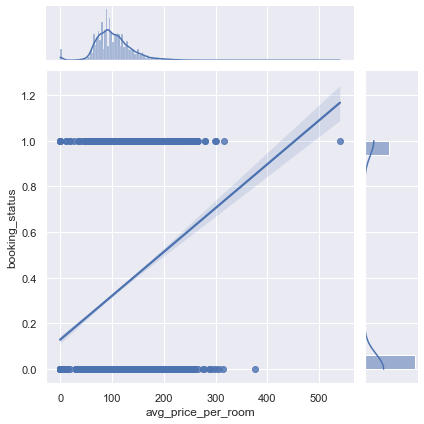

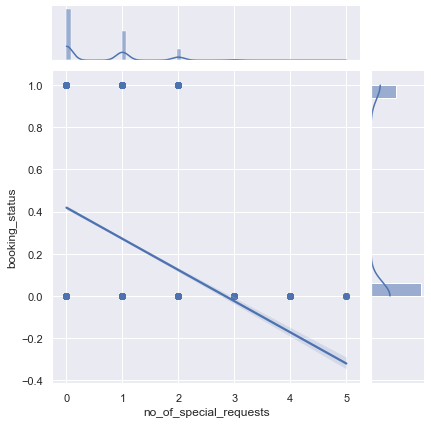

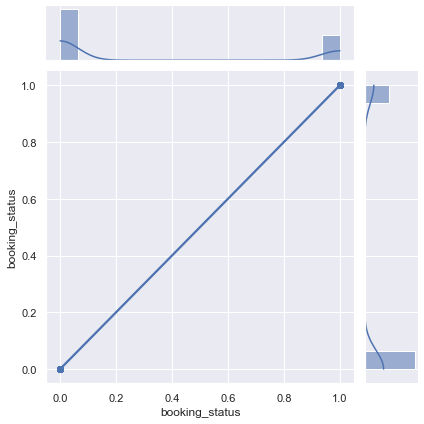

In [171]:
# Bivariate Analysis between Target Variable & Independent Variables(Numerical Variables) 
Create_JointPlots(train,num_cols_train,'booking_status');

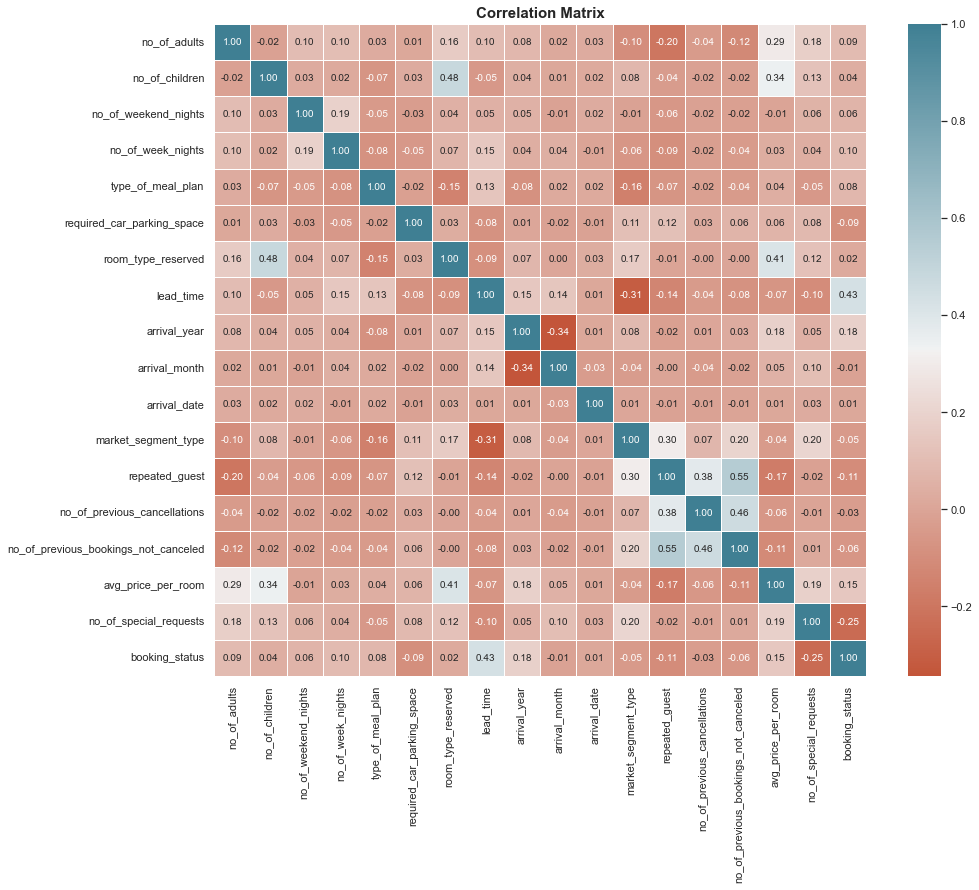

In [172]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = train.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

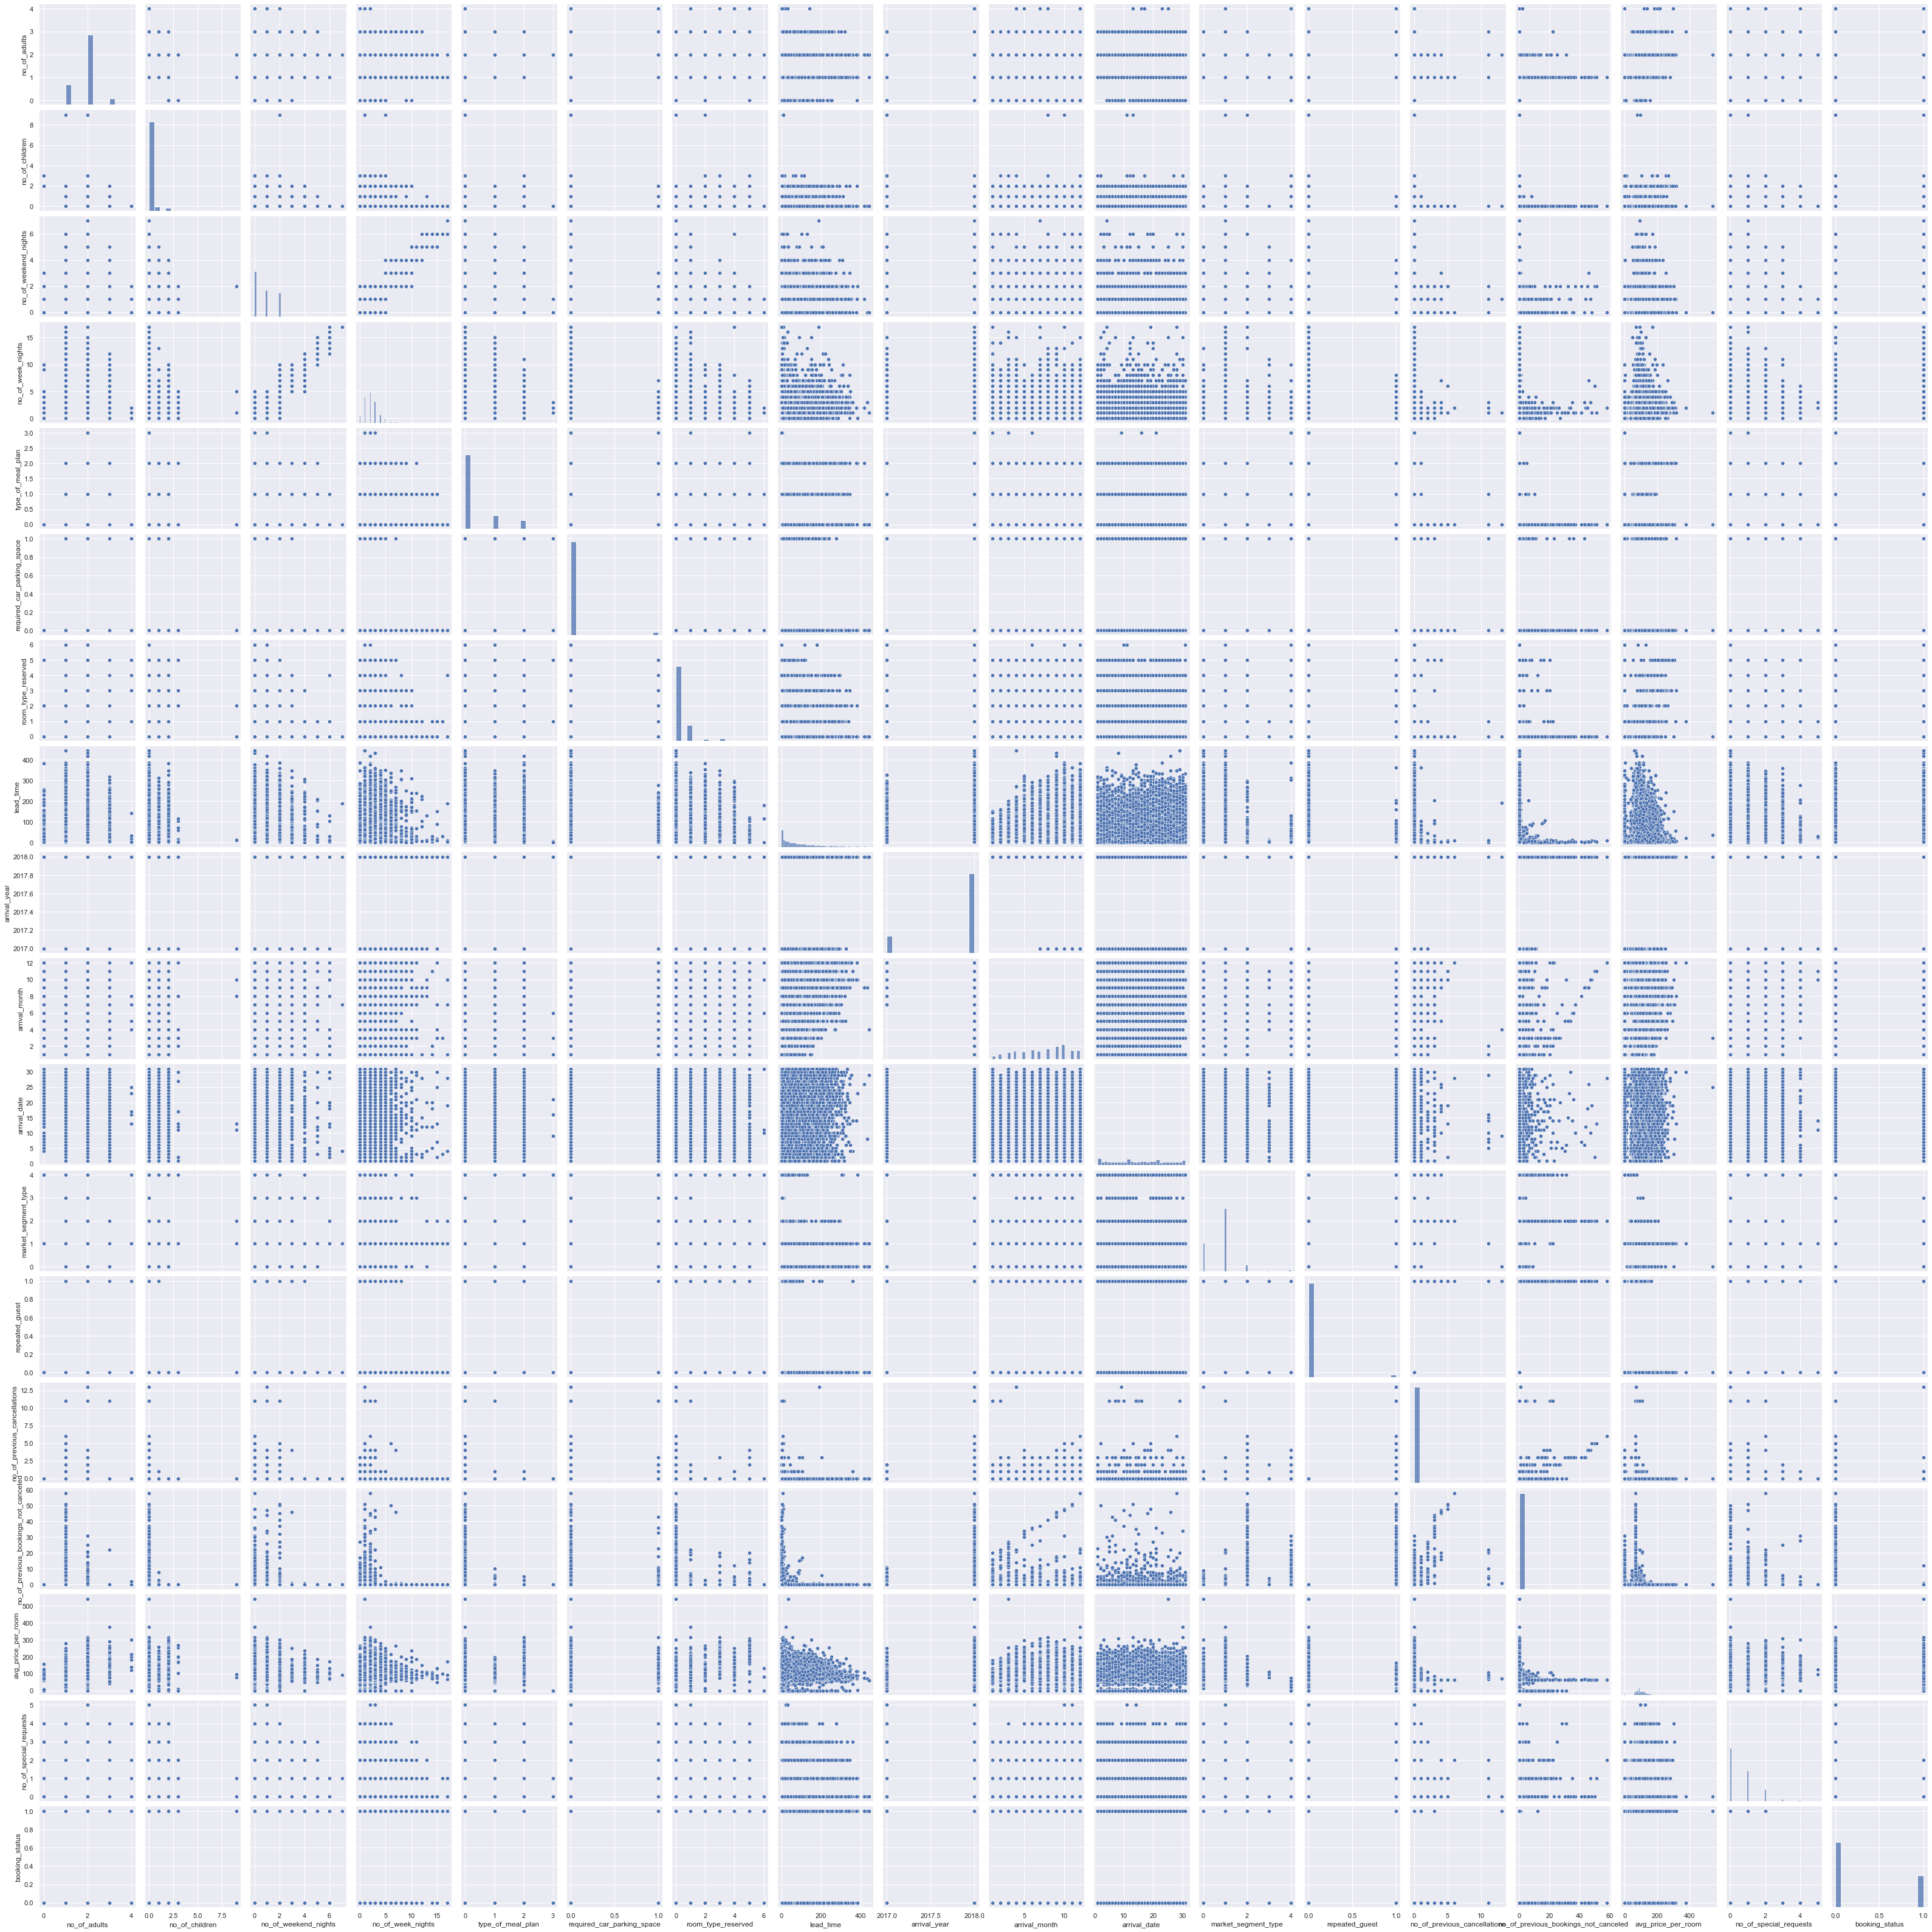

In [173]:
# Pair Plots to know the relation between different features
ax = sns.pairplot(train)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in Train DataSet</h2>
</div>


In [174]:
train.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in Test DataSet</h2>
</div>


In [175]:
test.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Datatypes in Train and Test DataSet</h2>
</div>


In [176]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          18137 non-null  int64  
 1   no_of_children                        18137 non-null  int64  
 2   no_of_weekend_nights                  18137 non-null  int64  
 3   no_of_week_nights                     18137 non-null  int64  
 4   type_of_meal_plan                     18137 non-null  int64  
 5   required_car_parking_space            18137 non-null  int64  
 6   room_type_reserved                    18137 non-null  int64  
 7   lead_time                             18137 non-null  int64  
 8   arrival_year                          18137 non-null  int64  
 9   arrival_month                         18137 non-null  int64  
 10  arrival_date                          18137 non-null  int64  
 11  market_segment_

In [177]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18138 entries, 0 to 18137
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          18138 non-null  int64  
 1   no_of_children                        18138 non-null  int64  
 2   no_of_weekend_nights                  18138 non-null  int64  
 3   no_of_week_nights                     18138 non-null  int64  
 4   type_of_meal_plan                     18138 non-null  int64  
 5   required_car_parking_space            18138 non-null  int64  
 6   room_type_reserved                    18138 non-null  int64  
 7   lead_time                             18138 non-null  int64  
 8   arrival_year                          18138 non-null  int64  
 9   arrival_month                         18138 non-null  int64  
 10  arrival_date                          18138 non-null  int64  
 11  market_segment_

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Preprocessing for Model Building</h2>
</div>


In [178]:
X = train.drop('booking_status',axis = 1)
y = train['booking_status']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))

Training set size: 12695
Validation set size: 2721
Test set size: 2721


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 1- Logistic Regression</h2>
</div>

Accuracy of Logistic Regression on training set: 0.78
Accuracy of Logistic Regression on test set: 0.78
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.80      0.89      0.84      1814
           1       0.72      0.55      0.63       907

    accuracy                           0.78      2721
   macro avg       0.76      0.72      0.74      2721
weighted avg       0.77      0.78      0.77      2721
 

---------------------------------------------------------------------------------------------------------------------
Classification Report of the Validation data:

               precision    recall  f1-score   support

           0       0.81      0.89      0.85      1838
           1       0.72      0.57      0.64       883

    accuracy                           0.79      2721
   macro avg       

Text(0.5, 257.44, 'Predicted label')

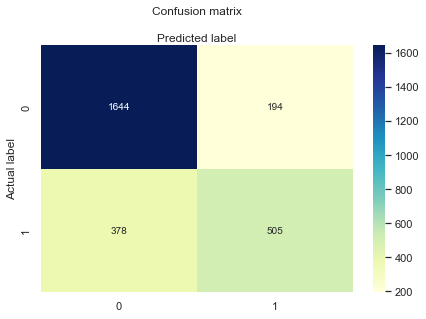

In [179]:
model1 = LogisticRegression(random_state=42)
model1.fit(X_train,y_train) 
print('Accuracy of Logistic Regression on training set: {:.2f}'
     .format(model1.score(X_train, y_train)))

print('Accuracy of Logistic Regression on test set: {:.2f}'
     .format(model1.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model1.predict(X_test)),'\n')

print('-------------'*9)

print('Classification Report of the Validation data:\n\n',classification_report(y_val, model1.predict(X_val)),'\n')
confusion_matrix = metrics.confusion_matrix(y_val, model1.predict(X_val))
class_names=[0,1] # Represent name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 2- Fitting Logistic Regression Model with best Hyperparameters generated by Random Search</h2>
</div>

Accuracy of Logistic Regression on training set: 0.79
Accuracy of Logistic Regression on test set: 0.79
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.81      0.90      0.85      1814
           1       0.74      0.57      0.64       907

    accuracy                           0.79      2721
   macro avg       0.77      0.73      0.75      2721
weighted avg       0.78      0.79      0.78      2721
 

---------------------------------------------------------------------------------------------------------------------
Classification Report of the Validation data:

               precision    recall  f1-score   support

           0       0.82      0.89      0.85      1838
           1       0.72      0.59      0.65       883

    accuracy                           0.79      2721
   macro avg       

Text(0.5, 257.44, 'Predicted label')

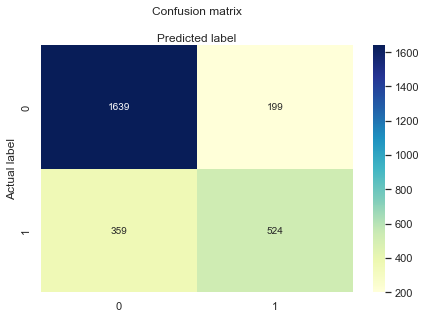

In [180]:
model2 = LogisticRegression(solver = 'newton-cg', penalty = 'l2', C = 0.1,random_state=42)
model2.fit(X_train,y_train) 
print('Accuracy of Logistic Regression on training set: {:.2f}'
     .format(model2.score(X_train, y_train)))

print('Accuracy of Logistic Regression on test set: {:.2f}'
     .format(model2.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model2.predict(X_test)),'\n')

print('-------------'*9)

print('Classification Report of the Validation data:\n\n',classification_report(y_val, model2.predict(X_val)),'\n')
confusion_matrix = metrics.confusion_matrix(y_val, model2.predict(X_val))
class_names=[0,1] # Represent name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 3- Fitting Logistic Regression Model with best Hyperparameters generated by Random Search with Balanced Weights</h2>
</div>

Accuracy of Logistic Regression on training set: 0.77
Accuracy of Logistic Regression on test set: 0.77
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.87      0.77      0.82      1814
           1       0.63      0.78      0.69       907

    accuracy                           0.77      2721
   macro avg       0.75      0.77      0.76      2721
weighted avg       0.79      0.77      0.78      2721
 

---------------------------------------------------------------------------------------------------------------------
Classification Report of the Validation data:

               precision    recall  f1-score   support

           0       0.88      0.78      0.83      1838
           1       0.63      0.77      0.69       883

    accuracy                           0.78      2721
   macro avg       

Text(0.5, 257.44, 'Predicted label')

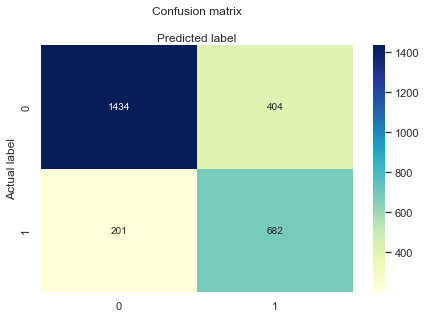

In [181]:
model3 = LogisticRegression(solver = 'newton-cg', penalty = 'l2', C = 0.1
                            ,class_weight='balanced',random_state=42)
model3.fit(X_train,y_train) 
print('Accuracy of Logistic Regression on training set: {:.2f}'
     .format(model3.score(X_train, y_train)))

print('Accuracy of Logistic Regression on test set: {:.2f}'
     .format(model3.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model3.predict(X_test)),'\n')

print('-------------'*9)

print('Classification Report of the Validation data:\n\n',classification_report(y_val, model3.predict(X_val)),'\n')
confusion_matrix = metrics.confusion_matrix(y_val, model3.predict(X_val))
class_names=[0,1] # Represent name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 4- Random Forest Classifier</h2>
</div>

Accuracy of Random Forest Classifier on training set: 1.00
Accuracy of Random Forest Classifier on test set: 0.89
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.90      0.94      0.92      1814
           1       0.87      0.79      0.83       907

    accuracy                           0.89      2721
   macro avg       0.89      0.86      0.87      2721
weighted avg       0.89      0.89      0.89      2721
 

---------------------------------------------------------------------------------------------------------------------
Classification Report of the Validation data:

               precision    recall  f1-score   support

           0       0.90      0.95      0.92      1838
           1       0.87      0.77      0.82       883

    accuracy                           0.89      2721
   macro 

Text(0.5, 257.44, 'Predicted label')

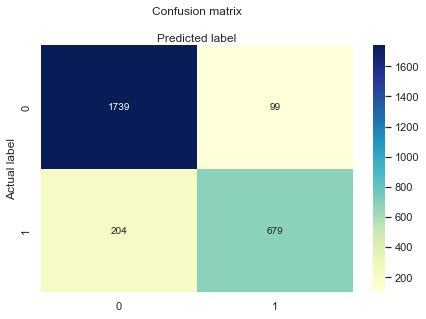

In [182]:
model4 = RandomForestClassifier(random_state=0)
model4.fit(X_train,y_train) 
print('Accuracy of Random Forest Classifier on training set: {:.2f}'
     .format(model4.score(X_train, y_train)))

print('Accuracy of Random Forest Classifier on test set: {:.2f}'
     .format(model4.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model4.predict(X_test)),'\n')

print('-------------'*9)

print('Classification Report of the Validation data:\n\n',classification_report(y_val, model4.predict(X_val)),'\n')
confusion_matrix = metrics.confusion_matrix(y_val, model4.predict(X_val))
class_names=[0,1] # Represent name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 5- Fitting Random Forest Classifier Model with best Hyperparameters generated by Random Search</h2>
</div>

Accuracy of Random Forest Classifier on training set: 1.00
Accuracy of Random Forest Classifier on test set: 0.89
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.90      0.94      0.92      1814
           1       0.87      0.79      0.83       907

    accuracy                           0.89      2721
   macro avg       0.88      0.87      0.87      2721
weighted avg       0.89      0.89      0.89      2721
 

---------------------------------------------------------------------------------------------------------------------
Classification Report of the Validation data:

               precision    recall  f1-score   support

           0       0.89      0.94      0.92      1838
           1       0.86      0.77      0.81       883

    accuracy                           0.89      2721
   macro 

Text(0.5, 257.44, 'Predicted label')

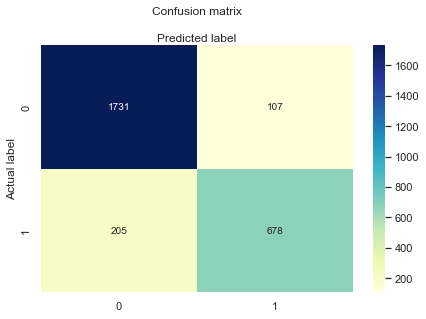

In [183]:
model5 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
model5.fit(X_train,y_train) 
print('Accuracy of Random Forest Classifier on training set: {:.2f}'
     .format(model5.score(X_train, y_train)))

print('Accuracy of Random Forest Classifier on test set: {:.2f}'
     .format(model5.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model5.predict(X_test)),'\n')

print('-------------'*9)

print('Classification Report of the Validation data:\n\n',classification_report(y_val, model5.predict(X_val)),'\n')
confusion_matrix = metrics.confusion_matrix(y_val, model5.predict(X_val))
class_names=[0,1] # Represent name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 6- Fitting Random Forest Classifier Model with best Hyperparameters generated by Random Search with Balanced Weights</h2>
</div>

Accuracy of Random Forest Classifier on training set: 1.00
Accuracy of Random Forest Classifier on test set: 0.89
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.90      0.94      0.92      1814
           1       0.88      0.79      0.83       907

    accuracy                           0.89      2721
   macro avg       0.89      0.87      0.88      2721
weighted avg       0.89      0.89      0.89      2721
 

---------------------------------------------------------------------------------------------------------------------
Classification Report of the Validation data:

               precision    recall  f1-score   support

           0       0.89      0.94      0.92      1838
           1       0.87      0.77      0.81       883

    accuracy                           0.89      2721
   macro 

Text(0.5, 257.44, 'Predicted label')

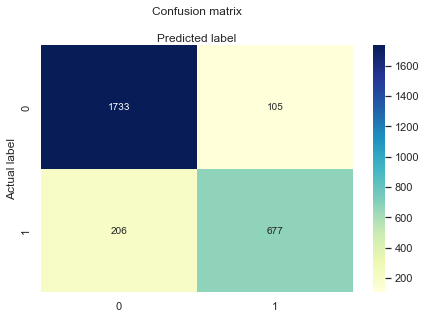

In [184]:
model6 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
model6.fit(X_train,y_train) 
print('Accuracy of Random Forest Classifier on training set: {:.2f}'
     .format(model6.score(X_train, y_train)))

print('Accuracy of Random Forest Classifier on test set: {:.2f}'
     .format(model6.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model6.predict(X_test)),'\n')

print('-------------'*9)

print('Classification Report of the Validation data:\n\n',classification_report(y_val, model6.predict(X_val)),'\n')
confusion_matrix = metrics.confusion_matrix(y_val, model6.predict(X_val))
class_names=[0,1] # Represent name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 7- Fitting Random Forest Classifier Model with best Hyperparameters generated by Random Search with Actual Class Weights</h2>
</div>

Accuracy of Random Forest Classifier on training set: 1.00
Accuracy of Random Forest Classifier on test set: 0.89
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.90      0.94      0.92      1814
           1       0.87      0.78      0.82       907

    accuracy                           0.89      2721
   macro avg       0.88      0.86      0.87      2721
weighted avg       0.89      0.89      0.89      2721
 

---------------------------------------------------------------------------------------------------------------------
Classification Report of the Validation data:

               precision    recall  f1-score   support

           0       0.89      0.94      0.92      1838
           1       0.87      0.76      0.81       883

    accuracy                           0.88      2721
   macro 

Text(0.5, 257.44, 'Predicted label')

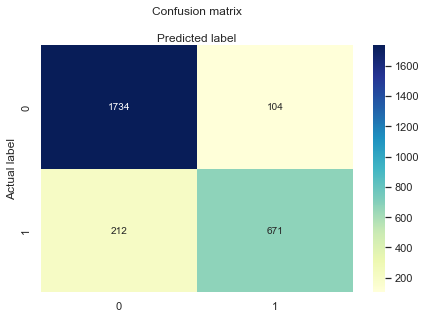

In [185]:
model7 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0
                                , class_weight={0: 0.7436244362443625, 1: 1.5261696398519018},
                       criterion='gini', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

model7.fit(X_train,y_train) 
print('Accuracy of Random Forest Classifier on training set: {:.2f}'
     .format(model7.score(X_train, y_train)))

print('Accuracy of Random Forest Classifier on test set: {:.2f}'
     .format(model7.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model7.predict(X_test)),'\n')

print('-------------'*9)

print('Classification Report of the Validation data:\n\n',classification_report(y_val, model7.predict(X_val)),'\n')
confusion_matrix = metrics.confusion_matrix(y_val, model7.predict(X_val))
class_names=[0,1] # Represent name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 8- LGBM Classifier</h2>
</div>

Accuracy of LGBM Classifier on training set: 0.91
Accuracy of LGBM Classifier on test set: 0.89
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.90      0.94      0.92      1814
           1       0.86      0.80      0.83       907

    accuracy                           0.89      2721
   macro avg       0.88      0.87      0.88      2721
weighted avg       0.89      0.89      0.89      2721
 

---------------------------------------------------------------------------------------------------------------------
Classification Report of the Validation data:

               precision    recall  f1-score   support

           0       0.89      0.93      0.91      1838
           1       0.84      0.77      0.80       883

    accuracy                           0.88      2721
   macro avg       0.87    

Text(0.5, 257.44, 'Predicted label')

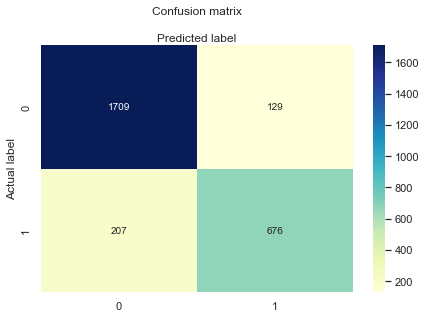

In [186]:
model8 = LGBMClassifier(random_state=0)

model8.fit(X_train,y_train) 
print('Accuracy of LGBM Classifier on training set: {:.2f}'
     .format(model8.score(X_train, y_train)))

print('Accuracy of LGBM Classifier on test set: {:.2f}'
     .format(model8.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model8.predict(X_test)),'\n')

print('-------------'*9)

print('Classification Report of the Validation data:\n\n',classification_report(y_val, model8.predict(X_val)),'\n')
confusion_matrix = metrics.confusion_matrix(y_val, model8.predict(X_val))
class_names=[0,1] # Represent name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 9- Fitting LGBM Classifier Model with best Hyperparameters generated by Random Search</h2>
</div>

Accuracy of LGBM Classifier on training set: 0.94
Accuracy of LGBM Classifier on test set: 0.89
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.90      0.94      0.92      1814
           1       0.86      0.79      0.82       907

    accuracy                           0.89      2721
   macro avg       0.88      0.86      0.87      2721
weighted avg       0.89      0.89      0.89      2721
 

---------------------------------------------------------------------------------------------------------------------
Classification Report of the Validation data:

               precision    recall  f1-score   support

           0       0.89      0.94      0.91      1838
           1       0.85      0.76      0.80       883

    accuracy                           0.88      2721
   macro avg       0.87    

Text(0.5, 257.44, 'Predicted label')

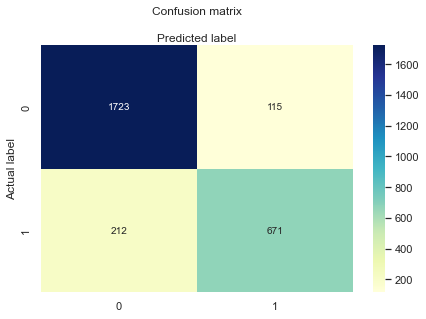

In [187]:
model9 = LGBMClassifier(reg_alpha = 2,num_leaves = 30, n_estimators = 500
                        , min_child_samples = 20, max_depth = -1
                        , learning_rate = 0.07, colsample_bytree = 1
                        , boosting_type = 'gbdt',random_state=0)

model9.fit(X_train,y_train) 
print('Accuracy of LGBM Classifier on training set: {:.2f}'
     .format(model9.score(X_train, y_train)))

print('Accuracy of LGBM Classifier on test set: {:.2f}'
     .format(model9.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model9.predict(X_test)),'\n')

print('-------------'*9)

print('Classification Report of the Validation data:\n\n',classification_report(y_val, model9.predict(X_val)),'\n')
confusion_matrix = metrics.confusion_matrix(y_val, model9.predict(X_val))
class_names=[0,1] # Represent name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 10- Fitting LGBM Classifier Model with best Hyperparameters generated by Random Search with Actual Class Weights</h2>
</div>

Accuracy of LGBM Classifier on training set: 0.94
Accuracy of LGBM Classifier on test set: 0.89
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.93      0.90      0.91      1814
           1       0.81      0.86      0.83       907

    accuracy                           0.89      2721
   macro avg       0.87      0.88      0.87      2721
weighted avg       0.89      0.89      0.89      2721
 

---------------------------------------------------------------------------------------------------------------------
Classification Report of the Validation data:

               precision    recall  f1-score   support

           0       0.92      0.90      0.91      1838
           1       0.80      0.83      0.81       883

    accuracy                           0.88      2721
   macro avg       0.86    

Text(0.5, 257.44, 'Predicted label')

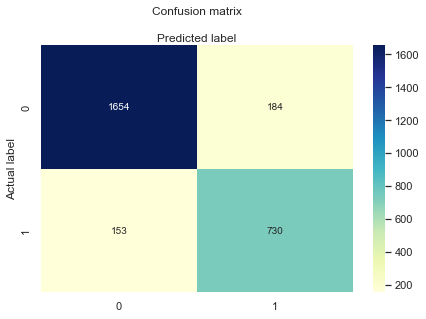

In [188]:
model10 = LGBMClassifier(reg_alpha = 2,num_leaves = 30, n_estimators = 500
                        , min_child_samples = 20, max_depth = -1
                        , learning_rate = 0.07, colsample_bytree = 1
                        , boosting_type = 'gbdt',random_state=0
                       ,class_weight={0: 0.7436244362443625, 1: 1.5261696398519018})

model10.fit(X_train,y_train) 
print('Accuracy of LGBM Classifier on training set: {:.2f}'
     .format(model10.score(X_train, y_train)))

print('Accuracy of LGBM Classifier on test set: {:.2f}'
     .format(model10.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model10.predict(X_test)),'\n')

print('-------------'*9)

print('Classification Report of the Validation data:\n\n',classification_report(y_val, model10.predict(X_val)),'\n')
confusion_matrix = metrics.confusion_matrix(y_val, model10.predict(X_val))
class_names=[0,1] # Represent name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 11- CatBoost Classifier</h2>
</div>

Accuracy of CatBoost Classifier on training set: 0.91
Accuracy of CatBoost Classifier on test set: 0.89
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.89      0.94      0.92      1814
           1       0.87      0.78      0.82       907

    accuracy                           0.89      2721
   macro avg       0.88      0.86      0.87      2721
weighted avg       0.88      0.89      0.88      2721
 

---------------------------------------------------------------------------------------------------------------------
Classification Report of the Validation data:

               precision    recall  f1-score   support

           0       0.89      0.94      0.91      1838
           1       0.86      0.75      0.80       883

    accuracy                           0.88      2721
   macro avg       

Text(0.5, 257.44, 'Predicted label')

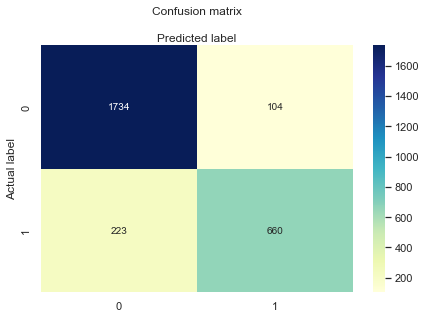

In [189]:
model11 = CatBoostClassifier(random_state=0,logging_level='Silent')

model11.fit(X_train,y_train) 
print('Accuracy of CatBoost Classifier on training set: {:.2f}'
     .format(model11.score(X_train, y_train)))

print('Accuracy of CatBoost Classifier on test set: {:.2f}'
     .format(model11.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model11.predict(X_test)),'\n')

print('-------------'*9)

print('Classification Report of the Validation data:\n\n',classification_report(y_val, model11.predict(X_val)),'\n')
confusion_matrix = metrics.confusion_matrix(y_val, model11.predict(X_val))
class_names=[0,1] # Represent name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 12- Fitting CatBoost Classifier Model with best Hyperparameters generated by Grid Search</h2>
</div>

Accuracy of CatBoost Classifier on training set: 0.86
Accuracy of CatBoost Classifier on test set: 0.85
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.86      0.93      0.90      1814
           1       0.84      0.70      0.76       907

    accuracy                           0.85      2721
   macro avg       0.85      0.81      0.83      2721
weighted avg       0.85      0.85      0.85      2721
 

---------------------------------------------------------------------------------------------------------------------
Classification Report of the Validation data:

               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1838
           1       0.84      0.68      0.75       883

    accuracy                           0.85      2721
   macro avg       

Text(0.5, 257.44, 'Predicted label')

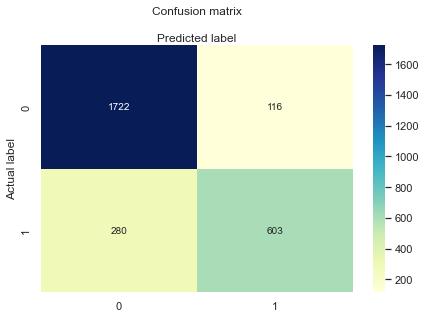

In [190]:
model12 = CatBoostClassifier(depth = 9,iterations = 100
                             , learning_rate = 0.04,random_state=0
                             ,logging_level='Silent')

model12.fit(X_train,y_train) 
print('Accuracy of CatBoost Classifier on training set: {:.2f}'
     .format(model12.score(X_train, y_train)))

print('Accuracy of CatBoost Classifier on test set: {:.2f}'
     .format(model12.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model12.predict(X_test)),'\n')

print('-------------'*9)

print('Classification Report of the Validation data:\n\n',classification_report(y_val, model12.predict(X_val)),'\n')
confusion_matrix = metrics.confusion_matrix(y_val, model12.predict(X_val))
class_names=[0,1] # Represent name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 13- XGB Classifier</h2>
</div>

Accuracy of XGB Classifier on training set: 0.94
Accuracy of XGB Classifier on test set: 0.89
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.90      0.94      0.92      1814
           1       0.87      0.79      0.83       907

    accuracy                           0.89      2721
   macro avg       0.88      0.87      0.87      2721
weighted avg       0.89      0.89      0.89      2721
 

---------------------------------------------------------------------------------------------------------------------
Classification Report of the Validation data:

               precision    recall  f1-score   support

           0       0.90      0.94      0.92      1838
           1       0.86      0.77      0.81       883

    accuracy                           0.88      2721
   macro avg       0.88      

Text(0.5, 257.44, 'Predicted label')

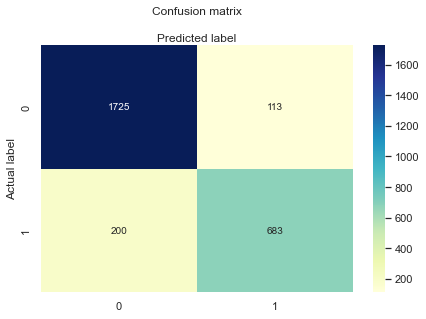

In [191]:
model13 = XGBClassifier(random_state=0)

model13.fit(X_train,y_train) 
print('Accuracy of XGB Classifier on training set: {:.2f}'
     .format(model13.score(X_train, y_train)))

print('Accuracy of XGB Classifier on test set: {:.2f}'
     .format(model13.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model13.predict(X_test)),'\n')

print('-------------'*9)

print('Classification Report of the Validation data:\n\n',classification_report(y_val, model13.predict(X_val)),'\n')
confusion_matrix = metrics.confusion_matrix(y_val, model13.predict(X_val))
class_names=[0,1] # Represent name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 14- Fitting XGB Classifier Model with best Hyperparameters generated by Random Search</h2>
</div>

Accuracy of XGB Classifier on training set: 0.94
Accuracy of XGB Classifier on test set: 0.89
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.90      0.94      0.92      1814
           1       0.87      0.79      0.83       907

    accuracy                           0.89      2721
   macro avg       0.88      0.87      0.87      2721
weighted avg       0.89      0.89      0.89      2721
 

---------------------------------------------------------------------------------------------------------------------
Classification Report of the Validation data:

               precision    recall  f1-score   support

           0       0.90      0.94      0.92      1838
           1       0.86      0.77      0.81       883

    accuracy                           0.88      2721
   macro avg       0.88      

Text(0.5, 257.44, 'Predicted label')

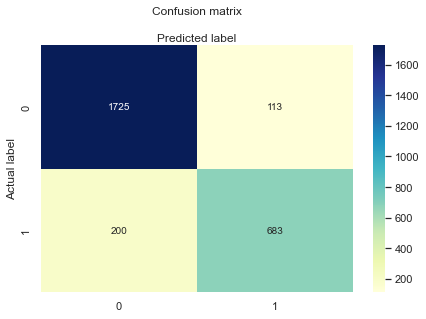

In [192]:
model14 = XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None,monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None)

model14.fit(X_train,y_train) 
print('Accuracy of XGB Classifier on training set: {:.2f}'
     .format(model14.score(X_train, y_train)))

print('Accuracy of XGB Classifier on test set: {:.2f}'
     .format(model14.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model14.predict(X_test)),'\n')

print('-------------'*9)

print('Classification Report of the Validation data:\n\n',classification_report(y_val, model14.predict(X_val)),'\n')
confusion_matrix = metrics.confusion_matrix(y_val, model14.predict(X_val))
class_names=[0,1] # Represent name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 15- Linear Support Vector Classification</h2>
</div>

Accuracy of Linear SVC on training set: 0.79
Accuracy of Linear SVC on test set: 0.79
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.81      0.90      0.85      1814
           1       0.74      0.57      0.64       907

    accuracy                           0.79      2721
   macro avg       0.77      0.73      0.75      2721
weighted avg       0.78      0.79      0.78      2721
 

---------------------------------------------------------------------------------------------------------------------
Classification Report of the Validation data:

               precision    recall  f1-score   support

           0       0.82      0.89      0.85      1838
           1       0.73      0.59      0.65       883

    accuracy                           0.79      2721
   macro avg       0.77      0.74    

Text(0.5, 257.44, 'Predicted label')

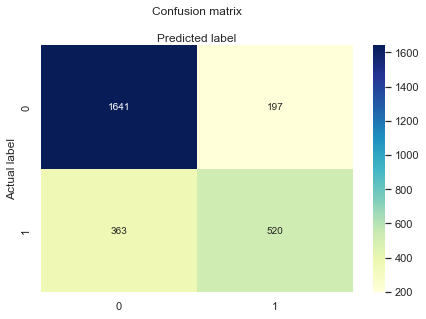

In [193]:
model15 = make_pipeline(StandardScaler(),LinearSVC())

model15.fit(X_train,y_train) 
print('Accuracy of Linear SVC on training set: {:.2f}'
     .format(model15.score(X_train, y_train)))

print('Accuracy of Linear SVC on test set: {:.2f}'
     .format(model15.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model15.predict(X_test)),'\n')

print('-------------'*9)

print('Classification Report of the Validation data:\n\n',classification_report(y_val, model15.predict(X_val)),'\n')
confusion_matrix = metrics.confusion_matrix(y_val, model15.predict(X_val))
class_names=[0,1] # Represent name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 16- Histogram Gradient Boosting Classification</h2>
</div>

Accuracy of Hist Gradient Boosting Classifier on training set: 0.90
Accuracy of Hist Gradient Boosting Classifier on test set: 0.88
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.90      0.93      0.91      1814
           1       0.85      0.78      0.82       907

    accuracy                           0.88      2721
   macro avg       0.87      0.86      0.87      2721
weighted avg       0.88      0.88      0.88      2721
 

---------------------------------------------------------------------------------------------------------------------
Classification Report of the Validation data:

               precision    recall  f1-score   support

           0       0.89      0.93      0.91      1838
           1       0.83      0.76      0.79       883

    accuracy                           0.87  

Text(0.5, 257.44, 'Predicted label')

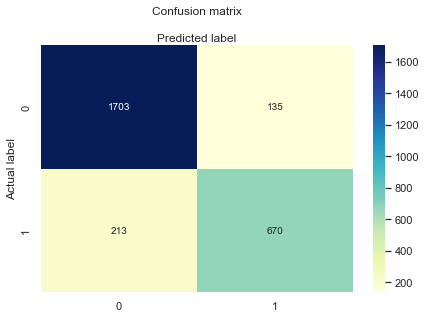

In [194]:
model16 = HistGradientBoostingClassifier(random_state=0)

model16.fit(X_train,y_train) 
print('Accuracy of Hist Gradient Boosting Classifier on training set: {:.2f}'
     .format(model16.score(X_train, y_train)))

print('Accuracy of Hist Gradient Boosting Classifier on test set: {:.2f}'
     .format(model16.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model16.predict(X_test)),'\n')

print('-------------'*9)

print('Classification Report of the Validation data:\n\n',classification_report(y_val, model16.predict(X_val)),'\n')
confusion_matrix = metrics.confusion_matrix(y_val, model16.predict(X_val))
class_names=[0,1] # Represent name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 17- Fitting Histogram Gradient Boosting Classifier Model with best Hyperparameters generated by Grid Search</h2>
</div>

Accuracy of Hist Gradient Boosting Classifier on training set: 0.91
Accuracy of Hist Gradient Boosting Classifier on test set: 0.88
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.89      0.94      0.91      1814
           1       0.86      0.78      0.82       907

    accuracy                           0.88      2721
   macro avg       0.88      0.86      0.87      2721
weighted avg       0.88      0.88      0.88      2721
 

---------------------------------------------------------------------------------------------------------------------
Classification Report of the Validation data:

               precision    recall  f1-score   support

           0       0.89      0.93      0.91      1838
           1       0.84      0.76      0.80       883

    accuracy                           0.87  

Text(0.5, 257.44, 'Predicted label')

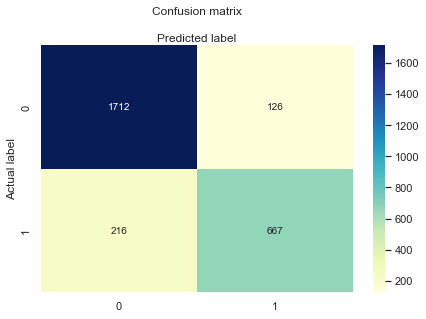

In [195]:
model17 = HistGradientBoostingClassifier(learning_rate = 0.1, max_depth = 5
                                         , max_iter = 300,random_state=0)

model17.fit(X_train,y_train) 
print('Accuracy of Hist Gradient Boosting Classifier on training set: {:.2f}'
     .format(model17.score(X_train, y_train)))

print('Accuracy of Hist Gradient Boosting Classifier on test set: {:.2f}'
     .format(model17.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model17.predict(X_test)),'\n')

print('-------------'*9)

print('Classification Report of the Validation data:\n\n',classification_report(y_val, model17.predict(X_val)),'\n')
confusion_matrix = metrics.confusion_matrix(y_val, model17.predict(X_val))
class_names=[0,1] # Represent name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 18- Ensemble Classifier</h2>
</div>

Accuracy of Ensemble Classifier on training set: 0.97
Accuracy of Ensemble Classifier on test set: 0.89
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.90      0.94      0.92      1814
           1       0.87      0.79      0.83       907

    accuracy                           0.89      2721
   macro avg       0.89      0.87      0.88      2721
weighted avg       0.89      0.89      0.89      2721
 

---------------------------------------------------------------------------------------------------------------------
Classification Report of the Validation data:

               precision    recall  f1-score   support

           0       0.90      0.94      0.92      1838
           1       0.87      0.77      0.82       883

    accuracy                           0.89      2721
   macro avg       

Text(0.5, 257.44, 'Predicted label')

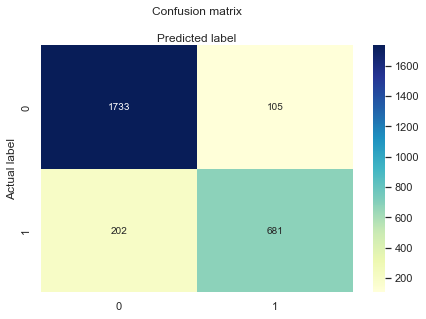

In [203]:
clf1 = model7
clf2 = model16

model18 = VotingClassifier(estimators=[('Random Forest Classifier Hyper', clf1)
                                       , ('Histogram Gradient Boosting Classification', clf2)]
                           , voting='soft')
model18.fit(X_train,y_train) 
print('Accuracy of Ensemble Classifier on training set: {:.2f}'
     .format(model18.score(X_train, y_train)))

print('Accuracy of Ensemble Classifier on test set: {:.2f}'
     .format(model18.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model18.predict(X_test)),'\n')

print('-------------'*9)

print('Classification Report of the Validation data:\n\n',classification_report(y_val, model18.predict(X_val)),'\n')
confusion_matrix = metrics.confusion_matrix(y_val, model18.predict(X_val))
class_names=[0,1] # Represent name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Predict Target Variable using Tuned Model</h2>
</div>

In [197]:
# Import Test data for the prediction of the Target Variable
x = np.array(test)

# Prediction using Model 1
y_pred1 = model1.predict(x) #Accuracy_Score = 78.6629

# Prediction using Model 2
y_pred2 = model2.predict(x) #Accuracy_Score = 79.3108

# Prediction using Model 3
y_pred3 = model3.predict(x) #Accuracy_Score = 76.3749

# Prediction using Model 4
y_pred4 = model4.predict(x) #Accuracy_Score = 88.8766

# Prediction using Model 5
y_pred5 = model5.predict(x) #Accuracy_Score = 88.8215

# Prediction using Model 6
y_pred6 = model6.predict(x) #Accuracy_Score = 88.8490

# Prediction using Model 7
y_pred7 = model7.predict(x) #Accuracy_Score = 88.9593

# Prediction using Model 8
y_pred8 = model8.predict(x) #Accuracy_Score = 88.4355

# Prediction using Model 9
y_pred9 = model9.predict(x) #Accuracy_Score = 88.2563

# Prediction using Model 10
y_pred10 = model10.predict(x) #Accuracy_Score = 87.2501

# Prediction using Model 11
y_pred11 = model11.predict(x) #Accuracy_Score = 87.8980

# Prediction using Model 12
y_pred12 = model12.predict(x) #Accuracy_Score = 84.8518

# Prediction using Model 13
y_pred13 = model13.predict(x) #Accuracy_Score = 88.2012

# Prediction using Model 14
y_pred14 = model14.predict(x) #Accuracy_Score = 88.2012

# Prediction using Model 15
y_pred15 = model15.predict(x) #Accuracy_Score = 79.3246

# Prediction using Model 16
y_pred16 = model16.predict(x) #Accuracy_Score = 88.0358

# Prediction using Model 17
y_pred17 = model17.predict(x) #Accuracy_Score = 87.9669

# Prediction using Model 18
y_pred18 = model18.predict(x) #Accuracy_Score = 89.5744

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Prepare Submission File in required format</h2>
</div>

In [205]:
y_pred = y_pred18
df1=pd.DataFrame(y_pred,columns=['booking_status'])
df1.to_csv(r'C:\Users\AB\Favorites\AB\Apnet\RCP\Final_Submission_Aniiket_Barphe.csv',index=False)
print("Process Completed")

Process Completed


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Summary</h2>
</div>

**Best Submission Accuracy Score on Leaderboard:-**  89.5744

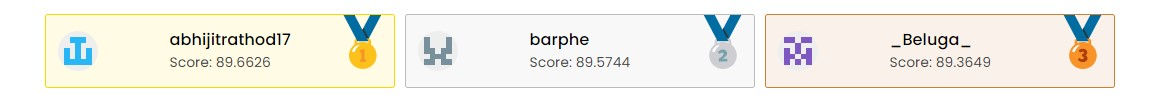

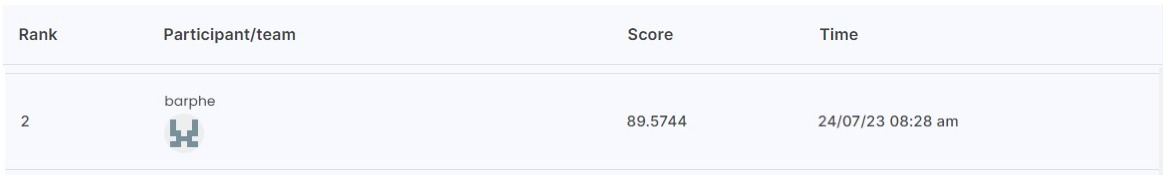

**Competition Link:-** https://aiplanet.com/challenges/319/create/leaderboard/practice

**Rank Scored:-**

a) **02** out of **13** registered participants